# Data Preparation

In [30]:
import pandas as pd
import csv
import numpy as np
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
import seaborn as sb

In [31]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
!ls

drive  sample_data


In [33]:
train_news = pd.read_csv('/content/drive/My Drive/data/fakeNews/train.csv')

In [34]:
test_news = pd.read_csv('/content/drive/My Drive/data/fakeNews/test.csv')
valid_news = pd.read_csv('/content/drive/My Drive/data/fakeNews/valid.csv')
valid_news = valid_news[:-1]

In [35]:
#data observations
def data_obs():
  print("Training data set")
  print(train_news.shape)
  print(train_news.head(10))
  print("------------------------------------")
  print("Testing data set")
  print(test_news.shape)
  print(test_news.head(10))
  print("------------------------------------")  
  print("Validation data set")
  print(valid_news.shape)
  print(valid_news.head(10))

In [36]:
data_obs()

Training data set
(10240, 2)
                                           Statement  Label
0  Says the Annies List political group supports ...  False
1  When did the decline of coal start? It started...   True
2  Hillary Clinton agrees with John McCain "by vo...   True
3  Health care reform legislation is likely to ma...  False
4  The economic turnaround started at the end of ...   True
5  The Chicago Bears have had more starting quart...   True
6  Jim Dunnam has not lived in the district he re...  False
7  I'm the only person on this stage who has work...   True
8  However, it took $19.5 million in Oregon Lotte...   True
9  Says GOP primary opponents Glenn Grothman and ...   True
------------------------------------
Testing data set
(2551, 2)
                                           Statement  Label
0  Building a wall on the U.S.-Mexico border will...   True
1  Wisconsin is on pace to double the number of l...  False
2  Says John McCain has done nothing to help the ...  False
3  Suza

In [37]:
#distribution of classes for prediction
def create_distribution(dataFile):
  return sb.countplot(x='Label',data=dataFile, palette='hls')

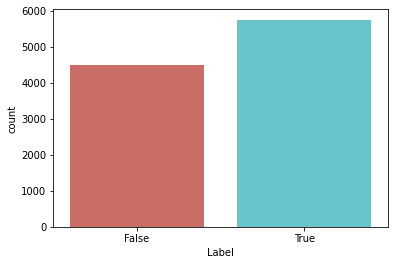

In [38]:
#by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(train_news)


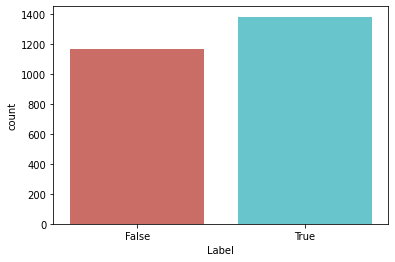

In [39]:
create_distribution(test_news)


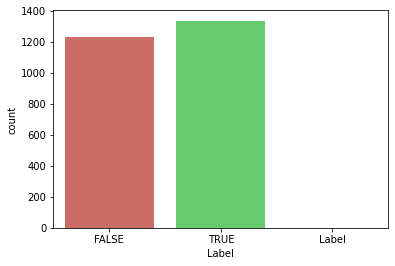

In [40]:
create_distribution(valid_news)

In [41]:
valid_news['Label'].value_counts()

TRUE     1336
FALSE    1232
Label       1
Name: Label, dtype: int64

In [42]:
valid_news = valid_news[valid_news.Label != 'Label']
valid_news['Label'].value_counts()

TRUE     1336
FALSE    1232
Name: Label, dtype: int64

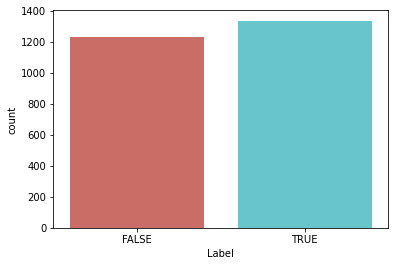

In [43]:
create_distribution(valid_news)

In [44]:
#data integrity check (missing label values)

def data_qualCheck(indata):

  print("checking data quality")
  indata.isnull().sum()
  indata.info()
  print("check finished")


In [45]:
data_qualCheck(train_news)
data_qualCheck(test_news)
data_qualCheck(valid_news)

checking data quality
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 90.1+ KB
check finished
checking data quality
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  2551 non-null   object
 1   Label      2551 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 22.5+ KB
check finished
checking data quality
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2569 entries, 0 to 2569
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  2569 non-null   object
 1   Label      2568 non-null   object
dtypes: object(2

In [46]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
eng_stemmer = SnowballStemmer('english')
stopwords = set(nltk.corpus.stopwords.words('english'))


In [48]:
#stemming

def stem_tokens(tokens, stemmer):
  stemmed=[]
  for token in tokens:
    stemmed.append(stemmer.stem(token))
  return stemmed

In [49]:
#process the data
def process_data(data,exclude_stopword= True, stem=True):
  tokens= [w.lower() for w in data]
  tokens_stemmed= stem_tokens(tokens, eng_stemmer)
  tokens_stemmed = [w for w in tokens_stemmed if w not in stopwords]
  return tokens_stemmed


In [50]:
# creating n grans

#unigrams 
def create_unigram(words):
  assert type(words) == list
  return words

#bigrams
def create_bigrams(words):
    assert type(words) == list
    skip = 0
    join_str = " "
    Len = len(words)
    if Len > 1:
        lst = []
        for i in range(Len-1):
            for k in range(1,skip+2):
                if i+k < Len:
                    lst.append(join_str.join([words[i],words[i+k]]))
    else:
        #set it as unigram
        lst = create_unigram(words)
    return lst

In [51]:
porter = PorterStemmer()

def tokenizer(text):
    return text.split()


def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

# Feature Selection

In [52]:
%pip install DataPrep

In [55]:

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import nltk
import nltk.corpus 
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec

In [58]:
!pip install DataPrep
import dataprep

In [60]:
#we will start with simple bag of words technique 
#creating feature vector - document term matrix
countV = CountVectorizer()
train_count = countV.fit_transform(train_news['Statement'].values)


In [61]:
print(countV)
print(train_count)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
  (0, 9676)	1
  (0, 10988)	1
  (0, 1044)	1
  (0, 6639)	1
  (0, 8376)	1
  (0, 5115)	1
  (0, 10709)	1
  (0, 11036)	1
  (0, 11296)	1
  (0, 615)	1
  (0, 7728)	1
  (0, 3278)	1
  (1, 10988)	1
  (1, 11934)	2
  (1, 3434)	1
  (1, 3185)	1
  (1, 7672)	1
  (1, 2475)	1
  (1, 10425)	1
  (1, 6052)	1
  (1, 10426)	2
  (1, 7418)	1
  (1, 4860)	1
  (1, 11138)	1
  (1, 7674)	1
  :	:
  (10239, 10988)	1
  (10239, 7672)	2
  (10239, 11110)	2
  (10239, 5267)	1
  (10239, 7828)	1
  (10239, 7824)	1
  (10239, 1159)	1
  (10239, 12151)	2
  (10239, 6327)	1
  (10239, 6603)	1
  (10239, 11013)	1
  (10239, 11004)	1


In [62]:
#print training doc term matrix
#we have matrix of size of (10240, 12196) by calling below
def get_countVectorizer_stats():
    
    #vocab size
    train_count.shape

    #check vocabulary using below command
    print(countV.vocabulary_)

    #get feature names
    print(countV.get_feature_names()[:25])


In [63]:
#create tf-df frequency features
#tf-idf 
tfidfV = TfidfTransformer()
train_tfidf = tfidfV.fit_transform(train_count)

def get_tfidf_stats():
    train_tfidf.shape
    #get train data feature names 
    print(train_tfidf.A[:10])

In [65]:
nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [67]:
tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)


#POS Tagging
tagged_sentences = nltk.corpus.treebank.tagged_sents()

cutoff = int(.75 * len(tagged_sentences))
training_sentences = train_news['Statement']
 
print(training_sentences)


0        Says the Annies List political group supports ...
1        When did the decline of coal start? It started...
2        Hillary Clinton agrees with John McCain "by vo...
3        Health care reform legislation is likely to ma...
4        The economic turnaround started at the end of ...
                               ...                        
10235    There are a larger number of shark attacks in ...
10236    Democrats have now become the party of the [At...
10237    Says an alternative to Social Security that op...
10238    On lifting the U.S. Cuban embargo and allowing...
10239    The Department of Veterans Affairs has a manua...
Name: Statement, Length: 10240, dtype: object


In [68]:
#training POS tagger based on words
def features(sentence, index):
    """ sentence: [w1, w2, ...], index: the index of the word """
    return {
        'word': sentence[index],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'is_all_caps': sentence[index].upper() == sentence[index],
        'is_all_lower': sentence[index].lower() == sentence[index],
        'prefix-1': sentence[index][0],
        'prefix-2': sentence[index][:2],
        'prefix-3': sentence[index][:3],
        'suffix-1': sentence[index][-1],
        'suffix-2': sentence[index][-2:],
        'suffix-3': sentence[index][-3:],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'has_hyphen': '-' in sentence[index],
        'is_numeric': sentence[index].isdigit(),
        'capitals_inside': sentence[index][1:].lower() != sentence[index][1:]
    }

In [73]:
#helper function to strip tags from tagged corpus	
def untag(tagged_sentence):
    return [w for w, t in tagged_sentence]





model = Word2Vec(training_sentences, size=100) # x be tokenized text
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

collecting all words and their counts
Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
PROGRESS: at sentence #10000, processed 1068447 words, keeping 92 word types
collected 93 word types from a corpus of 1094742 raw words and 10240 sentences
Loading a fresh vocabulary
effective_min_count=5 retains 83 unique words (89% of original 93, drops 10)
effective_min_count=5 leaves 1094719 word corpus (99% of original 1094742, drops 23)
deleting the raw counts dictionary of 93 items
sample=0.001 downsamples 28 most-common words
downsampling leaves estimated 243591 word corpus (22.3% of prior 1094719)
estimated required memory for 83 words and 100 dimensions: 107900 bytes
resetting layer weights
training model with 3 workers on 83 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
worker thread finished; awaiting finish of 2 more t

In [74]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])


In [76]:
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


In [79]:
#string to test
doc_new = ['obama is running for president in 2016']

#the feature selection has been done in FeatureSelection.py module. here we will create models using those features for prediction

#first we will use bag of words techniques

#building classifier using naive bayes 
nb_pipeline = Pipeline([
        ('NBCV',countV),
        ('nb_clf',MultinomialNB())])

nb_pipeline.fit(train_news['Statement'],train_news['Label'])
predicted_nb = nb_pipeline.predict(test_news['Statement'])
np.mean(predicted_nb == test_news['Label'])


0.6072128577028616

In [81]:
#building classifier using logistic regression
logR_pipeline = Pipeline([
        ('LogRCV',countV),
        ('LogR_clf',LogisticRegression())
        ])

logR_pipeline.fit(train_news['Statement'],train_news['Label'])
predicted_LogR = logR_pipeline.predict(test_news['Statement'])
np.mean(predicted_LogR == test_news['Label'])


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6013328106624853

In [82]:
#building Linear SVM classfier
svm_pipeline = Pipeline([
        ('svmCV',countV),
        ('svm_clf',svm.LinearSVC())
        ])

svm_pipeline.fit(train_news['Statement'],train_news['Label'])
predicted_svm = svm_pipeline.predict(test_news['Statement'])
np.mean(predicted_svm == test_news['Label'])

0.5723245785966288

In [84]:
#using SVM Stochastic Gradient Descent on hinge loss
sgd_pipeline = Pipeline([
        ('svm2CV',countV),
        ('svm2_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3))
        ])

sgd_pipeline.fit(train_news['Statement'],train_news['Label'])
predicted_sgd = sgd_pipeline.predict(test_news['Statement'])
np.mean(predicted_sgd == test_news['Label'])


0.6162289298314386

In [85]:
#random forest
random_forest = Pipeline([
        ('rfCV',countV),
        ('rf_clf',RandomForestClassifier(n_estimators=200,n_jobs=3))
        ])
    
random_forest.fit(train_news['Statement'],train_news['Label'])
predicted_rf = random_forest.predict(test_news['Statement'])
np.mean(predicted_rf == test_news['Label'])

0.631125049000392

In [92]:
#User defined functon for K-Fold cross validatoin
def build_confusion_matrix(classifier):
    
    k_fold = KFold(n_splits=5)
    scores = []
    confusion = np.array([[0,0],[0,0]])

    for train_ind, test_ind in k_fold.split(train_news):
        train_text = train_news.iloc[train_ind]['Statement'] 
        train_y = train_news.iloc[train_ind]['Label']
    
        test_text = train_news.iloc[test_ind]['Statement']
        test_y = train_news.iloc[test_ind]['Label']
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
        
        confusion += confusion_matrix(test_y,predictions)
        score = f1_score(test_y,predictions)
        scores.append(score)
    
    return (print('Total statements classified:', train_news),
    print('Score:', sum(scores)/len(scores)),
    print('score length', len(scores)),
    print('Confusion matrix:'),
    print(confusion))

In [93]:
#K-fold cross validation for all classifiers
build_confusion_matrix(nb_pipeline)
build_confusion_matrix(logR_pipeline)
build_confusion_matrix(svm_pipeline)
build_confusion_matrix(sgd_pipeline)
build_confusion_matrix(random_forest)

Total statements classified:                                                Statement  Label
0      Says the Annies List political group supports ...  False
1      When did the decline of coal start? It started...   True
2      Hillary Clinton agrees with John McCain "by vo...   True
3      Health care reform legislation is likely to ma...  False
4      The economic turnaround started at the end of ...   True
...                                                  ...    ...
10235  There are a larger number of shark attacks in ...   True
10236  Democrats have now become the party of the [At...   True
10237  Says an alternative to Social Security that op...   True
10238  On lifting the U.S. Cuban embargo and allowing...  False
10239  The Department of Veterans Affairs has a manua...  False

[10240 rows x 2 columns]
Score: 0.66961153965076
score length 5
Confusion matrix:
[[2118 2370]
 [1664 4088]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Total statements classified:                                                Statement  Label
0      Says the Annies List political group supports ...  False
1      When did the decline of coal start? It started...   True
2      Hillary Clinton agrees with John McCain "by vo...   True
3      Health care reform legislation is likely to ma...  False
4      The economic turnaround started at the end of ...   True
...                                                  ...    ...
10235  There are a larger number of shark attacks in ...   True
10236  Democrats have now become the party of the [At...   True
10237  Says an alternative to Social Security that op...   True
10238  On lifting the U.S. Cuban embargo and allowing...  False
10239  The Department of Veterans Affairs has a manua...  False

[10240 rows x 2 columns]
Score: 0.6466692934443682
score length 5
Confusion matrix:
[[2254 2234]
 [1936 3816]]
Total statements classified:                                                Statement  Labe

(None, None, None, None, None)

In [95]:
##Now using n-grams
#naive-bayes classifier
nb_pipeline_ngram = Pipeline([
        ('nb_tfidf',tfidf_ngram),
        ('nb_clf',MultinomialNB())])

nb_pipeline_ngram.fit(train_news['Statement'],train_news['Label'])
predicted_nb_ngram = nb_pipeline_ngram.predict(test_news['Statement'])
np.mean(predicted_nb_ngram == test_news['Label'])


#logistic regression classifier
logR_pipeline_ngram = Pipeline([
        ('LogR_tfidf',tfidf_ngram),
        ('LogR_clf',LogisticRegression(penalty="l2",C=1))
        ])

logR_pipeline_ngram.fit(train_news['Statement'],train_news['Label'])
predicted_LogR_ngram = logR_pipeline_ngram.predict(test_news['Statement'])
np.mean(predicted_LogR_ngram == test_news['Label'])


#linear SVM classifier
svm_pipeline_ngram = Pipeline([
        ('svm_tfidf',tfidf_ngram),
        ('svm_clf',svm.LinearSVC())
        ])

svm_pipeline_ngram.fit(train_news['Statement'],train_news['Label'])
predicted_svm_ngram = svm_pipeline_ngram.predict(test_news['Statement'])
np.mean(predicted_svm_ngram == test_news['Label'])


#sgd classifier
sgd_pipeline_ngram = Pipeline([
         ('sgd_tfidf',tfidf_ngram),
         ('sgd_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3))
         ])

sgd_pipeline_ngram.fit(train_news['Statement'],train_news['Label'])
predicted_sgd_ngram = sgd_pipeline_ngram.predict(test_news['Statement'])
np.mean(predicted_sgd_ngram == test_news['Label'])


#random forest classifier
random_forest_ngram = Pipeline([
        ('rf_tfidf',tfidf_ngram),
        ('rf_clf',RandomForestClassifier(n_estimators=300,n_jobs=3))
        ])
    
random_forest_ngram.fit(train_news['Statement'],train_news['Label'])
predicted_rf_ngram = random_forest_ngram.predict(test_news['Statement'])
np.mean(predicted_rf_ngram == test_news['Label'])

0.6032928263426107

In [96]:
#K-fold cross validation for all classifiers
build_confusion_matrix(nb_pipeline_ngram)
build_confusion_matrix(logR_pipeline_ngram)
build_confusion_matrix(svm_pipeline_ngram)
build_confusion_matrix(sgd_pipeline_ngram)
build_confusion_matrix(random_forest_ngram)

Total statements classified:                                                Statement  Label
0      Says the Annies List political group supports ...  False
1      When did the decline of coal start? It started...   True
2      Hillary Clinton agrees with John McCain "by vo...   True
3      Health care reform legislation is likely to ma...  False
4      The economic turnaround started at the end of ...   True
...                                                  ...    ...
10235  There are a larger number of shark attacks in ...   True
10236  Democrats have now become the party of the [At...   True
10237  Says an alternative to Social Security that op...   True
10238  On lifting the U.S. Cuban embargo and allowing...  False
10239  The Department of Veterans Affairs has a manua...  False

[10240 rows x 2 columns]
Score: 0.7224053159841455
score length 5
Confusion matrix:
[[ 758 3730]
 [ 390 5362]]
Total statements classified:                                                Statement  Labe

(None, None, None, None, None)

In [97]:
print(classification_report(test_news['Label'], predicted_nb_ngram))
print(classification_report(test_news['Label'], predicted_LogR_ngram))
print(classification_report(test_news['Label'], predicted_svm_ngram))
print(classification_report(test_news['Label'], predicted_sgd_ngram))
print(classification_report(test_news['Label'], predicted_rf_ngram))

test_news['Label'].shape

              precision    recall  f1-score   support

       False       0.72      0.19      0.30      1169
        True       0.58      0.94      0.71      1382

    accuracy                           0.59      2551
   macro avg       0.65      0.56      0.51      2551
weighted avg       0.64      0.59      0.52      2551

              precision    recall  f1-score   support

       False       0.64      0.39      0.49      1169
        True       0.61      0.81      0.70      1382

    accuracy                           0.62      2551
   macro avg       0.62      0.60      0.59      2551
weighted avg       0.62      0.62      0.60      2551

              precision    recall  f1-score   support

       False       0.61      0.47      0.53      1169
        True       0.62      0.74      0.68      1382

    accuracy                           0.62      2551
   macro avg       0.61      0.61      0.60      2551
weighted avg       0.62      0.62      0.61      2551

              preci

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(2551,)

In [99]:
"""
Out of all the models fitted, we would take 2 best performing model. we would call them candidate models
from the confusion matrix, we can see that random forest and logistic regression are best performing 
in terms of precision and recall (take a look into false positive and true negative counts which appeares
to be low compared to rest of the models)
"""

#grid-search parameter optimization
#random forest classifier parameters
parameters = {'rf_tfidf__ngram_range': [(1, 1), (1, 2),(1,3),(1,4),(1,5)],
               'rf_tfidf__use_idf': (True, False),
               'rf_clf__max_depth': (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15)
}

gs_clf = GridSearchCV(random_forest_ngram, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(train_news['Statement'][:10000],train_news['Label'][:10000])

gs_clf.best_score_
gs_clf.best_params_
gs_clf.cv_results_

{'mean_fit_time': array([1.47371435, 1.46537452, 1.92311239, 1.949541  , 2.36867304,
        2.38844643, 2.87391453, 2.82029543, 3.25215344, 3.25514655,
        1.46822085, 1.47102942, 2.03265748, 1.99019284, 2.52423573,
        2.47702751, 3.03459716, 3.00821247, 3.52114911, 3.40988774,
        1.56988688, 1.53382115, 2.09341636, 2.09589758, 2.68555107,
        2.59515805, 3.19185185, 3.13098707, 3.58924918, 3.53362193,
        1.62196908, 1.60297413, 2.2239069 , 2.18518853, 2.80775857,
        2.7969358 , 3.41390791, 3.36057611, 3.8483736 , 3.8004343 ,
        1.71646724, 1.65541153, 2.32662983, 2.32748799, 3.03158875,
        2.99592738, 3.67935934, 3.65008111, 4.24615498, 4.11295381,
        1.8069489 , 1.78525081, 2.57929769, 2.50713596, 3.3767211 ,
        3.1865561 , 3.91229367, 3.84174409, 4.36937504, 4.28643069,
        1.87550397, 1.87222877, 2.69518728, 2.64417129, 3.44310083,
        3.45302429, 4.13079433, 4.04824009, 4.7143599 , 4.57106829,
        1.92601919, 1.88938699,

In [100]:
#logistic regression parameters
parameters = {'LogR_tfidf__ngram_range': [(1, 1), (1, 2),(1,3),(1,4),(1,5)],
               'LogR_tfidf__use_idf': (True, False),
               'LogR_tfidf__smooth_idf': (True, False)
}

gs_clf = GridSearchCV(logR_pipeline_ngram, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(train_news['Statement'][:10000],train_news['Label'][:10000])

gs_clf.best_score_
gs_clf.best_params_
gs_clf.cv_results_

{'mean_fit_time': array([0.60706296, 0.48396392, 0.55614743, 0.49026675, 1.78417439,
        1.90405054, 1.64494538, 1.77041464, 2.59323835, 3.17503948,
        2.477495  , 3.30101404, 3.10719128, 3.95236163, 3.19317703,
        3.87697959, 3.83612475, 4.55120902, 4.12474642, 4.43579116]),
 'mean_score_time': array([0.07031407, 0.05956478, 0.06251893, 0.06466718, 0.10156622,
        0.09952254, 0.09707322, 0.09064822, 0.1237371 , 0.1218204 ,
        0.1325377 , 0.12786894, 0.16016054, 0.14892354, 0.15997672,
        0.148385  , 0.17276511, 0.16327519, 0.18073659, 0.1559145 ]),
 'mean_test_score': array([0.6046, 0.6106, 0.6055, 0.6106, 0.6142, 0.6105, 0.614 , 0.6105,
        0.6149, 0.6103, 0.6162, 0.6103, 0.6165, 0.6097, 0.6159, 0.6097,
        0.616 , 0.6093, 0.6151, 0.6093]),
 'param_LogR_tfidf__ngram_range': masked_array(data=[(1, 1), (1, 1), (1, 1), (1, 1), (1, 2), (1, 2), (1, 2),
                    (1, 2), (1, 3), (1, 3), (1, 3), (1, 3), (1, 4), (1, 4),
                    (1, 4)

In [101]:
#Linear SVM 
parameters = {'svm_tfidf__ngram_range': [(1, 1), (1, 2),(1,3),(1,4),(1,5)],
               'svm_tfidf__use_idf': (True, False),
               'svm_tfidf__smooth_idf': (True, False),
               'svm_clf__penalty': ('l1','l2'),
}

gs_clf = GridSearchCV(svm_pipeline_ngram, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(train_news['Statement'][:10000],train_news['Label'][:10000])

gs_clf.best_score_
gs_clf.best_params_
gs_clf.cv_results_

{'mean_fit_time': array([0.27562871, 0.2653419 , 0.25939837, 0.26118646, 0.70499821,
        0.67945232, 0.69748945, 0.6868989 , 1.18233395, 1.15121217,
        1.16899972, 1.1519433 , 1.58248491, 1.55129514, 1.60075951,
        1.54939013, 1.96882272, 1.91851168, 1.96943369, 1.90894117,
        0.31454673, 0.31153164, 0.31370535, 0.31600199, 0.78535776,
        0.77593269, 0.80305181, 0.76170554, 1.29680924, 1.25848918,
        1.31931   , 1.2697124 , 1.75566978, 1.67557788, 1.75966997,
        1.70461693, 2.21615992, 2.1512536 , 2.20118532, 2.09079056]),
 'mean_score_time': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05989451, 0.06066689, 0.0613739 , 0.05847921, 0.10028982,
        0.09683599, 0.10558548, 0.10479226, 0.13066401, 0.12198334,
        0.

In [103]:
import sklearn.metrics as metrics
#running both random forest and logistic regression models again with best parameter found with GridSearch method
random_forest_final = Pipeline([
        ('rf_tfidf',TfidfVectorizer(stop_words='english',ngram_range=(1,3),use_idf=True,smooth_idf=True)),
        ('rf_clf',RandomForestClassifier(n_estimators=300,n_jobs=3,max_depth=10))
        ])
    
random_forest_final.fit(train_news['Statement'],train_news['Label'])
predicted_rf_final = random_forest_final.predict(test_news['Statement'])
np.mean(predicted_rf_final == test_news['Label'])
print(metrics.classification_report(test_news['Label'], predicted_rf_final))

logR_pipeline_final = Pipeline([
        #('LogRCV',countV_ngram),
        ('LogR_tfidf',TfidfVectorizer(stop_words='english',ngram_range=(1,5),use_idf=True,smooth_idf=False)),
        ('LogR_clf',LogisticRegression(penalty="l2",C=1))
        ])

logR_pipeline_final.fit(train_news['Statement'],train_news['Label'])
predicted_LogR_final = logR_pipeline_final.predict(test_news['Statement'])
np.mean(predicted_LogR_final == test_news['Label'])
#accuracy = 0.62
print(metrics.classification_report(test_news['Label'], predicted_LogR_final))

              precision    recall  f1-score   support

       False       0.50      0.00      0.00      1169
        True       0.54      1.00      0.70      1382

    accuracy                           0.54      2551
   macro avg       0.52      0.50      0.35      2551
weighted avg       0.52      0.54      0.38      2551

              precision    recall  f1-score   support

       False       0.64      0.38      0.48      1169
        True       0.61      0.82      0.70      1382

    accuracy                           0.62      2551
   macro avg       0.62      0.60      0.59      2551
weighted avg       0.62      0.62      0.60      2551



In [104]:
#saving best model to the disk
model_file = 'final_model.sav'
pickle.dump(logR_pipeline_ngram,open(model_file,'wb'))

In [105]:
#Plotting learing curve
def plot_learing_curve(pipeline,title):
    size = 10000
    cv = KFold(size, shuffle=True)
    
    X = train_news["Statement"]
    y = train_news["Label"]
    
    pl = pipeline
    pl.fit(X,y)
    
    train_sizes, train_scores, test_scores = learning_curve(pl, X, y, n_jobs=-1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
       
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
     
    plt.figure()
    plt.title(title)
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()

In [ ]:
#below command will plot learing curves for each of the classifiers
plot_learing_curve(nb_pipeline_ngram,"Naive-bayes Classifier")



In [ ]:
plot_learing_curve(logR_pipeline_ngram,"LogisticRegression Classifier")


In [ ]:
plot_learing_curve(svm_pipeline_ngram,"SVM Classifier")


In [ ]:
plot_learing_curve(sgd_pipeline_ngram,"SGD Classifier")


In [ ]:
plot_learing_curve(random_forest_ngram,"RandomForest Classifier")

In [2]:
#plotting Precision-Recall curve
def plot_PR_curve(classifier):
    
    precision, recall, thresholds = precision_recall_curve(test_news['Label'], classifier)
    average_precision = average_precision_score(test_news['Label'], classifier)
    
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Random Forest Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))
    
plot_PR_curve(predicted_LogR_ngram)
plot_PR_curve(predicted_rf_ngram)

NameError: ignored

In [ ]:
def show_most_informative_features(model, vect, clf, text=None, n=50):
    # Extract the vectorizer and the classifier from the pipeline
    vectorizer = model.named_steps[vect]
    classifier = model.named_steps[clf]

     # Check to make sure that we can perform this computation
    if not hasattr(classifier, 'coef_'):
        raise TypeError(
            "Cannot compute most informative features on {}.".format(
                classifier.__class__.__name__
            )
        )
            
    if text is not None:
        # Compute the coefficients for the text
        tvec = model.transform([text]).toarray()
    else:
        # Otherwise simply use the coefficients
        tvec = classifier.coef_

    # Zip the feature names with the coefs and sort
    coefs = sorted(
        zip(tvec[0], vectorizer.get_feature_names()),
        reverse=True
    )
    
    # Get the top n and bottom n coef, name pairs
    topn  = zip(coefs[:n], coefs[:-(n+1):-1])

    # Create the output string to return
    output = []

    # If text, add the predicted value to the output.
    if text is not None:
        output.append("\"{}\"".format(text))
        output.append(
            "Classified as: {}".format(model.predict([text]))
        )
        output.append("")

    # Create two columns with most negative and most positive features.
    for (cp, fnp), (cn, fnn) in topn:
        output.append(
            "{:0.4f}{: >15}    {:0.4f}{: >15}".format(
                cp, fnp, cn, fnn
            )
        )
    #return "\n".join(output)
    print(output)

In [ ]:
show_most_informative_features(logR_pipeline_ngram,vect='LogR_tfidf',clf='LogR_clf')
show_most_informative_features(nb_pipeline_ngram,vect='nb_tfidf',clf='nb_clf')
show_most_informative_features(svm_pipeline_ngram,vect='svm_tfidf',clf='svm_clf')
show_most_informative_features(sgd_pipeline_ngram,vect='sgd_tfidf',clf='sgd_clf')